In [14]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#Read csv
csv_path = ("./city_data.csv")
csv_path2 = ("./ride_data.csv")

city_data = pd.read_csv(csv_path)
ride_data = pd.read_csv(csv_path2)

#Show columns in city_data
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
#Show columns in ride_data
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [9]:
#Merge tables
merge_table = pd.merge(ride_data, city_data, on="city")

In [10]:
#Filter data by type (urban, suburban, rural)
urban = merge_table[merge_table.type == "Urban"]
suburban = merge_table[merge_table.type == "Suburban"]
rural = merge_table[merge_table.type == "Rural"]

In [18]:
#Get total number of rides per city
rides_count = ride_data.groupby(["city"]).count()
rides_count = rides_count["date"]
rides_count = pd.DataFrame(rides_count)
rides_count.head()

,date
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [15]:
#Bubble plot plan:
#X-axis: Average fare per city
#Y-axis: Total Number of Drivers per city
#Size of bubble: Total Number of Rides per city
#Color of bubbles: city type(urban, suburban, rural)

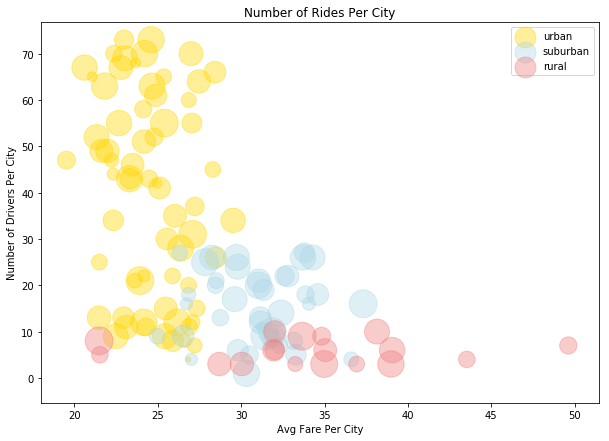

In [56]:
#Set colors for city types
city_types = (urban, suburban, rural)
colors = ("gold", "lightblue", "lightcoral")
groups = ("urban", "suburban", "rural")

#Scatter plot
size = [i * 25 for i in rides_count["date"]]

fig, ax=plt.subplots(1,1,figsize=(10,7))

for city_type, color, group in zip(city_types, colors, groups):
    ax.scatter(city_type.groupby("city")["fare"].mean()
              ,city_type.groupby("city")["driver_count"].mean()
              ,s=size *40
              ,alpha=0.4
              ,c=color
              ,label=group)
    
plt.legend()

# Add titles
plt.title("Number of Rides Per City")
plt.xlabel("Avg Fare Per City")
plt.ylabel("Number of Drivers Per City")

In [ ]:
% of Total Fares by City Type
% of Total Rides by City Type
% of Total Drivers by City Type

In [52]:
# % of Total Rides by City Type
#Labels for pie chart
labels = ["Urban", "Suburban", "Rural"]

#Values of each section of pie chart
num_rides = merge_table["type"].value_counts()
num_rides

Urban       1625
Suburban     657
Rural        125
Name: type, dtype: int64

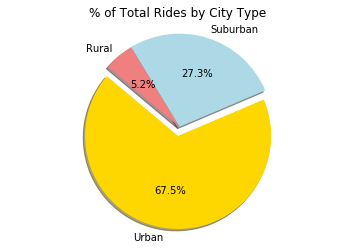

In [53]:
#Explode
explode = (0.1, 0, 0)
# Create the pie chart based upon the values above
plt.pie(num_rides
        ,explode=explode
        ,labels=labels
        ,autopct="%1.1f%%"
        ,shadow=True
        ,startangle=140
        ,colors=("gold", "lightblue", "lightcoral"))
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

In [42]:
grouped_type = merge_table.groupby(["type"]).sum()
num_drivers = grouped_type["driver_count"]
num_drivers

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

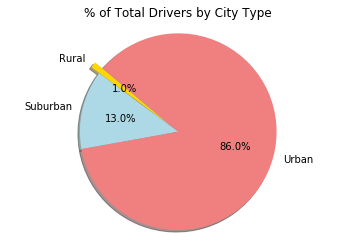

In [44]:
#Labels for pie chart
labels = ["Rural", "Suburban", "Urban"]

#Explode
explode = (0.1, 0, 0)

# Create the pie chart based upon the values above
plt.pie(num_drivers
        ,explode=explode
        ,labels=labels
        ,autopct="%1.1f%%"
        ,shadow=True
        ,startangle=140
        ,colors=("gold", "lightblue", "lightcoral"))
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()

In [129]:
grouped_type.head()

,level_0,index,fare,ride_id,driver_count
type,,,,,
Rural,293000,293000,4255.09,658729360193746,727
Suburban,1283121,1283121,20335.69,3139583688401015,9730
Urban,1319500,1319500,40078.34,7890194186030600,64501


In [47]:
num_fares = grouped_type["fare"]
num_fares

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

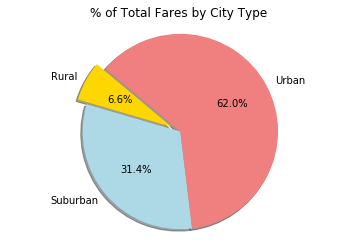

In [49]:
#Labels for pie chart
labels = ["Rural", "Suburban", "Urban"]

#Explode
explode = (0.1, 0, 0)

# Create the pie chart based upon the values above
plt.pie(num_fares
        ,explode=explode
        ,labels=labels
        ,autopct="%1.1f%%"
        ,shadow=True
        ,startangle=140
        ,colors = ("gold", "lightblue", "lightcoral"))
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

Three observable trends based on data:
1. The number of drivers has a positive correlation with the number of rides in a city.
2. The highest fares occur in rural towns where there are not many drivers.
3. There are no more than 30 drivers in each suburan or rural city, where most urban cities have over 30 drivers.